In Qiskit the order of the qubits in the bit string is Qn-1, ... Q0

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator


qc_example = QuantumCircuit(2,2)
qc_example.x(0)

qc_measure = QuantumCircuit(2,2)
qc_measure.measure_all(add_bits=False)
qc_compose = qc_example.compose(qc_measure)

from qiskit.primitives.estimator import Estimator
from qiskit.quantum_info import SparsePauliOp
estimator = Estimator()
opt = SparsePauliOp.from_list([("IZ", 1)])
job = estimator.run(qc_example, opt, shots=1000)
result = job.result()
print(f" > Expectation values: {result.values}")
print(Operator(opt))


from qiskit.primitives.sampler import Sampler
sampler = Sampler()
job = sampler.run(qc_compose, shots=1000)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(qc_compose)
print(job.result().get_counts())

from qiskit.quantum_info import Statevector
# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**2)
# Evolve the state by the quantum circuit
state = state.evolve(qc_example)
print(state)


 > Expectation values: [-1.]
Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
 > Quasi probability distribution: [{1: 1.0}]
{'01': 1024}
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator


qc_example = QuantumCircuit(2,2)
qc_example.x(1)

qc_measure = QuantumCircuit(2,2)
qc_measure.measure_all(add_bits=False)
qc_compose = qc_example.compose(qc_measure)

from qiskit.primitives.estimator import Estimator
from qiskit.quantum_info import SparsePauliOp
estimator = Estimator()
opt = SparsePauliOp.from_list([("ZI", 1)])
job = estimator.run(qc_example, opt, shots=1000)
result = job.result()
print(f" > Expectation values: {result.values}")
print(Operator(opt))


from qiskit.primitives.sampler import Sampler
sampler = Sampler()
job = sampler.run(qc_compose, shots=1000)
result = job.result()
print(f" > Quasi probability distribution: {result.quasi_dists}")

from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(qc_compose)
print(job.result().get_counts())

from qiskit.quantum_info import Statevector
# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**2)
# Evolve the state by the quantum circuit
state = state.evolve(qc_example)
print(state)

 > Expectation values: [-1.]
Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
 > Quasi probability distribution: [{2: 1.0}]
{'10': 1024}
Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


In [3]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

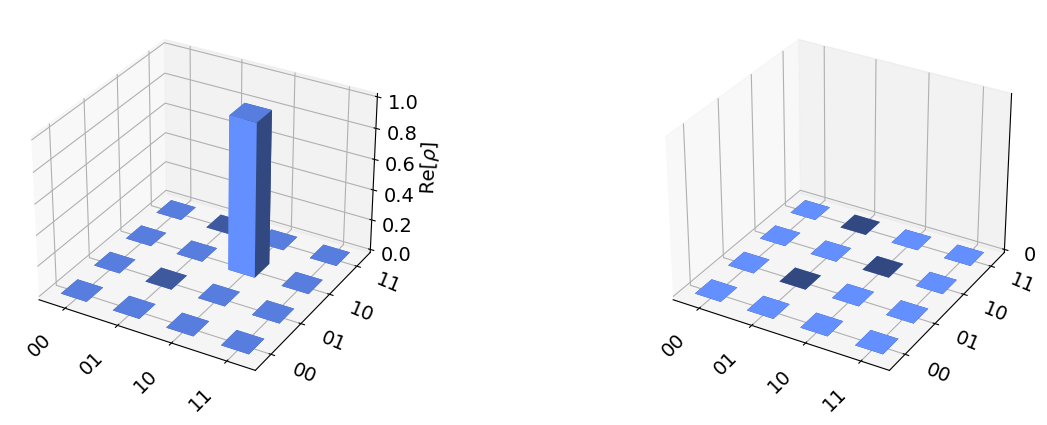

In [10]:
plot_state_city(state)

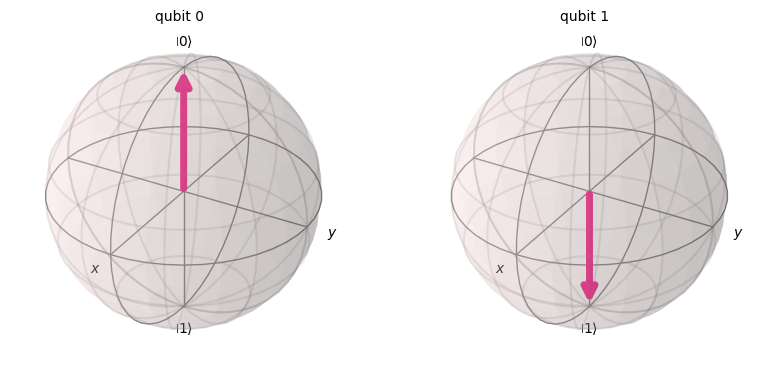

In [4]:
plot_bloch_multivector(state)

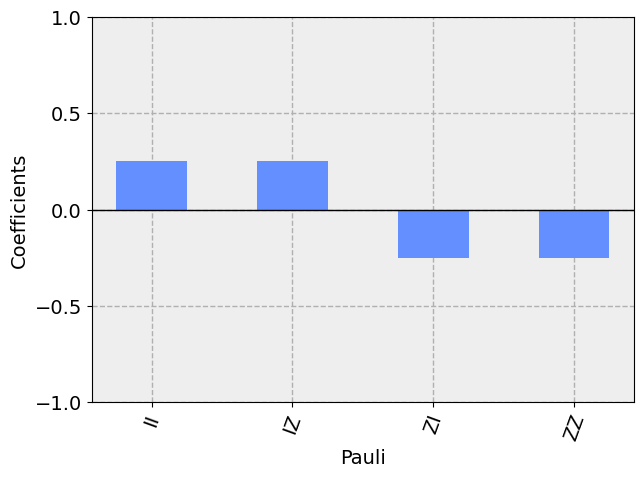

In [5]:
plot_state_paulivec(state)

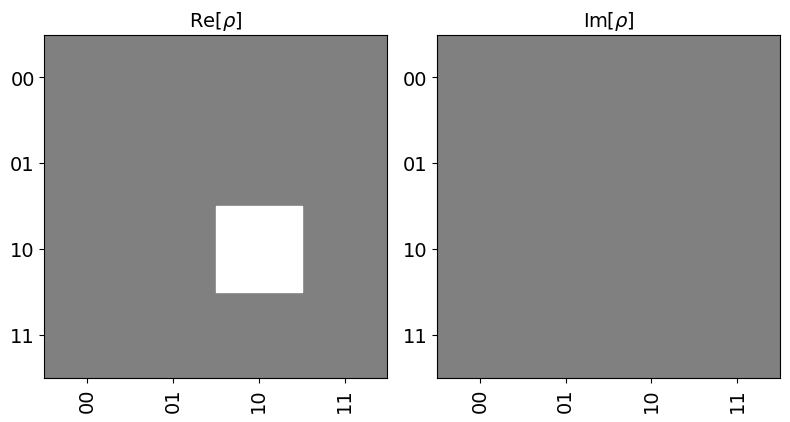

In [6]:
plot_state_hinton(state)

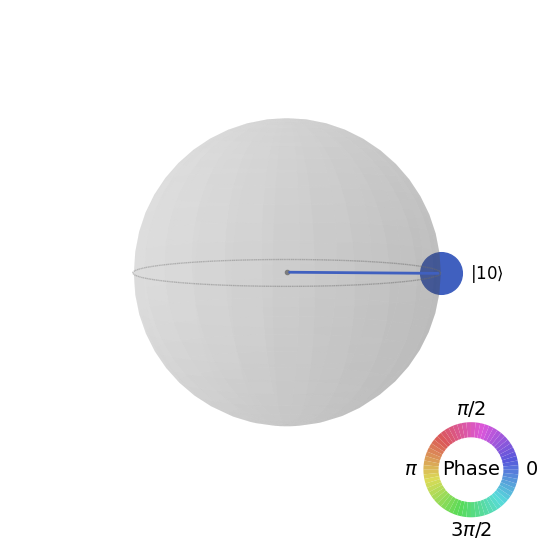

In [7]:
plot_state_qsphere(state)

The order in 00 01 10 11 -> 0, 1, 2, 3

Note: This representation of the bitstring puts the most significant bit (MSB) on the left, and the least significant bit (LSB) on the right. This is the standard ordering of binary bitstrings. We order the qubits in the same way (qubit representing the MSB has index 0), which is why Qiskit uses a non-standard tensor product order.

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford, Operator
qc = QuantumCircuit(2)
qc.cx(0,1)
print(qc)

clifford = Clifford(qc)

print(clifford)

operator = Operator(qc)

print(operator)


          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
Clifford: Stabilizer = ['+IZ', '+ZZ'], Destabilizer = ['+XX', '+XI']
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [9]:
from qiskit.quantum_info import Pauli, SparsePauliOp
Z = Pauli('Z')
I = Pauli('I')
operator = Z ^ I
print("As Pauli Op: ", repr(operator))
print(operator.to_matrix())

As Pauli Op:  Pauli('ZI')
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]]
